## 随机梯度下降法

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

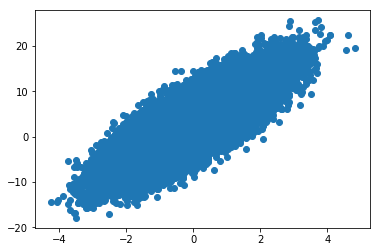

In [12]:
plt.scatter(x, y)
plt.show()

In [13]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [14]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 2.76 s, sys: 60.7 ms, total: 2.82 s
Wall time: 1.57 s


In [15]:
theta

array([ 2.9920056 ,  4.00306361])

### 随机梯度下降法

In [16]:
def dJ_sgd(theta, X_b_i, y_i):
    #return X_b_i * (X_b_i.dot(theta) - y_i) * 2. 
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):

    theta = initial_theta
    t0 = 5
    t1 = 50
    m = len(X_b)
    
    def learning_rate(t):
        return t0 / (t + t1)

    for cur_iter in range(n_iters):
        rand_i = np.random.randint(m)
        
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [17]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

CPU times: user 493 ms, sys: 9.14 ms, total: 502 ms
Wall time: 513 ms


In [18]:
theta

array([ 2.97628812,  4.01139129])